In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

Missing Values:
Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

Summary Statistics:
              Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
s

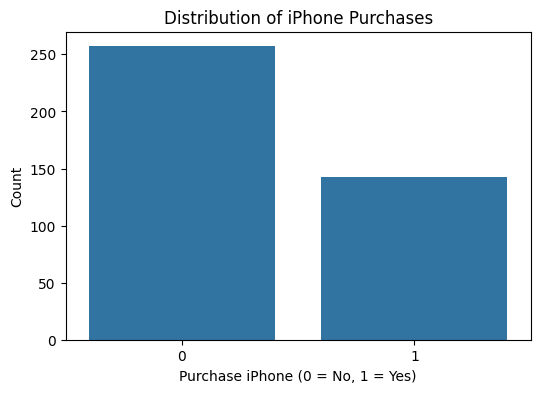

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Distribution of iPhone Purchases')
plt.xlabel('Purchase iPhone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
    

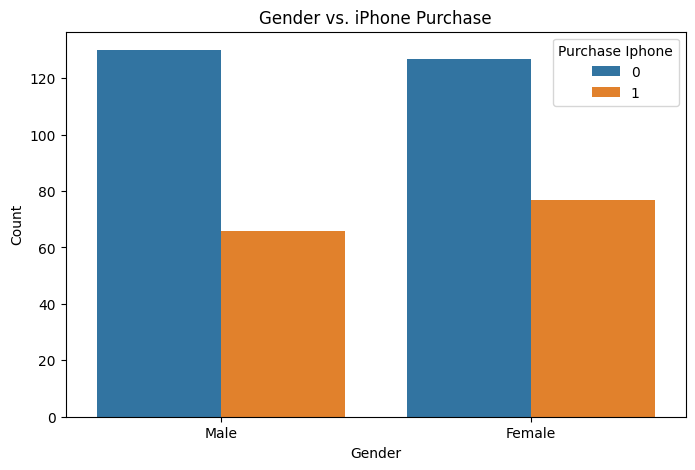

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchase Iphone', data=df)
plt.title('Gender vs. iPhone Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
    

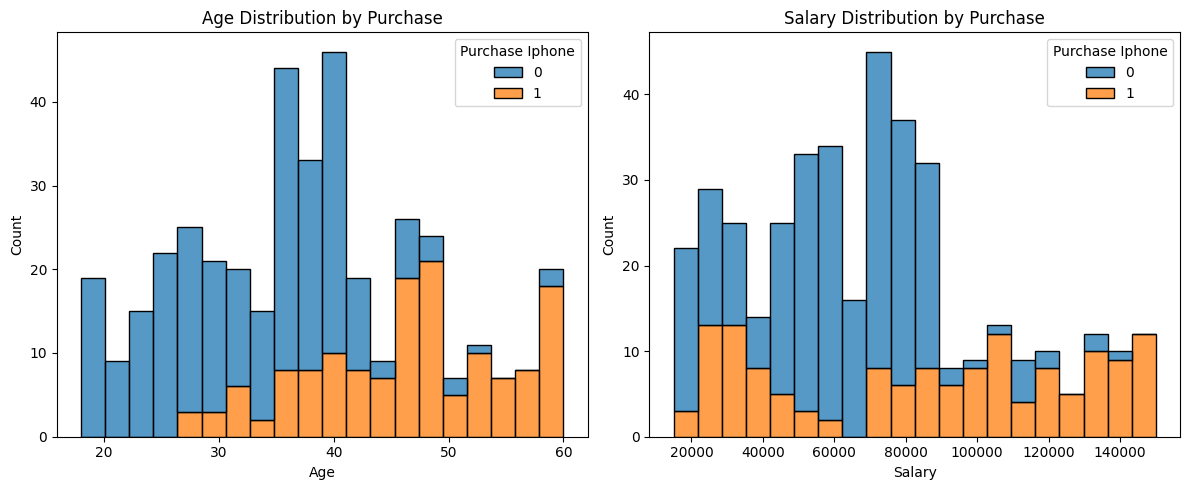

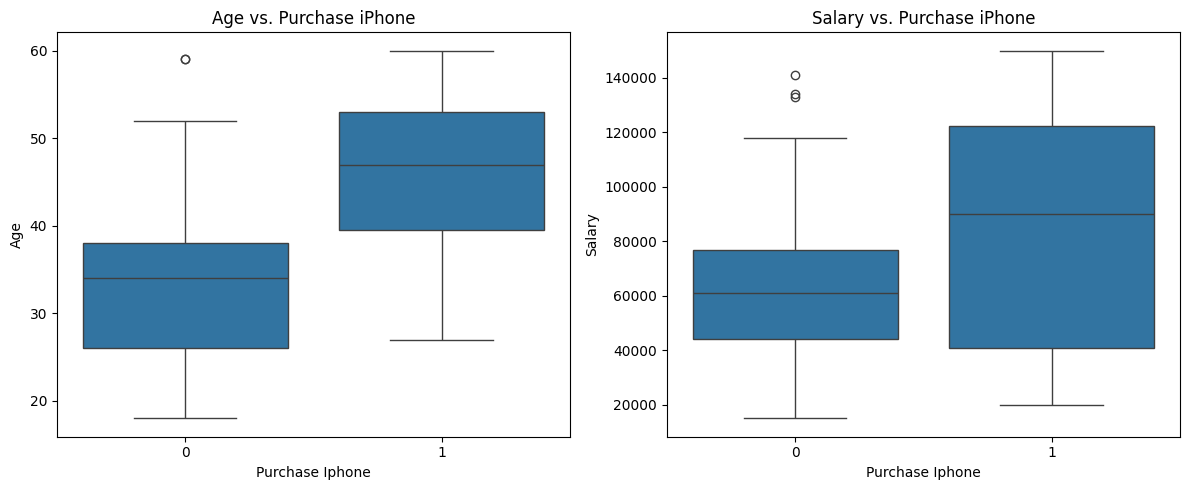

In [5]:
# Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Age Distribution by Purchase')

# Salary distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Salary', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Salary Distribution by Purchase')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title('Age vs. Purchase iPhone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title('Salary vs. Purchase iPhone')
plt.tight_layout()
plt.show()

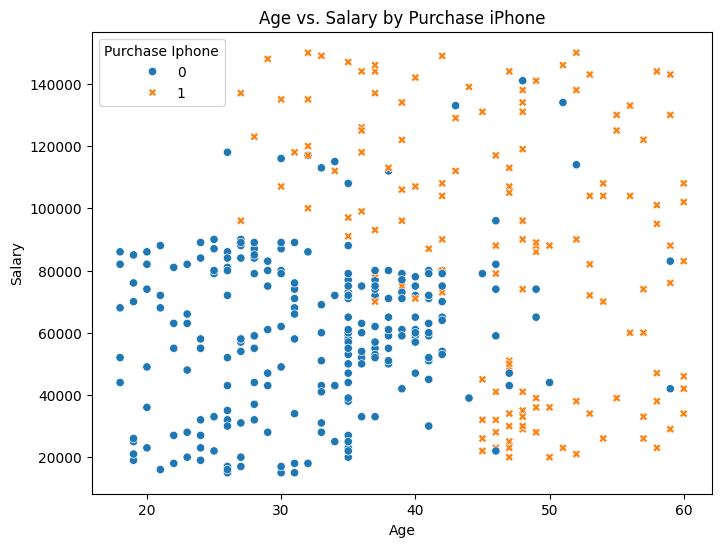

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', style='Purchase Iphone', data=df)
plt.title('Age vs. Salary by Purchase iPhone')
plt.show()
    

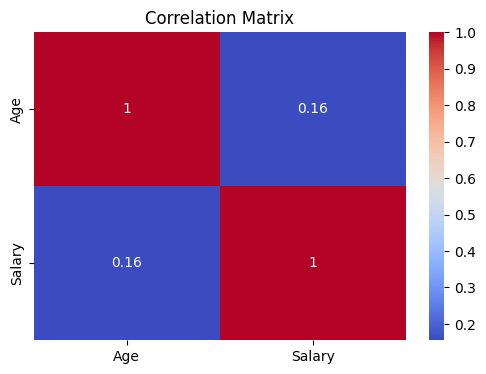

In [7]:
# Correlation matrix (excluding Gender as it's categorical)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
    

In [8]:
# Define features and target
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']

# One-Hot Encoding for Gender
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Gender'])
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
    

Training set shape: (320, 3)
Testing set shape: (80, 3)


In [9]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90625  0.953125 0.875    0.828125 0.890625]
Mean CV Score: 0.890625


Test Set Accuracy: 0.875


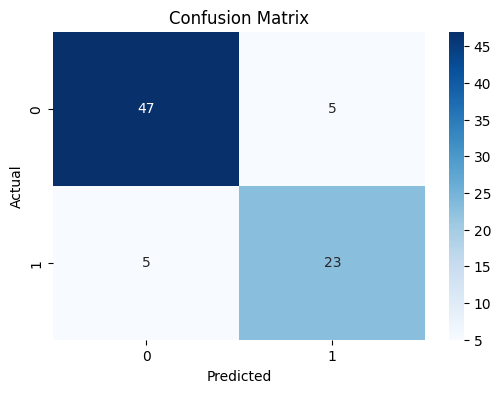


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



In [10]:
# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

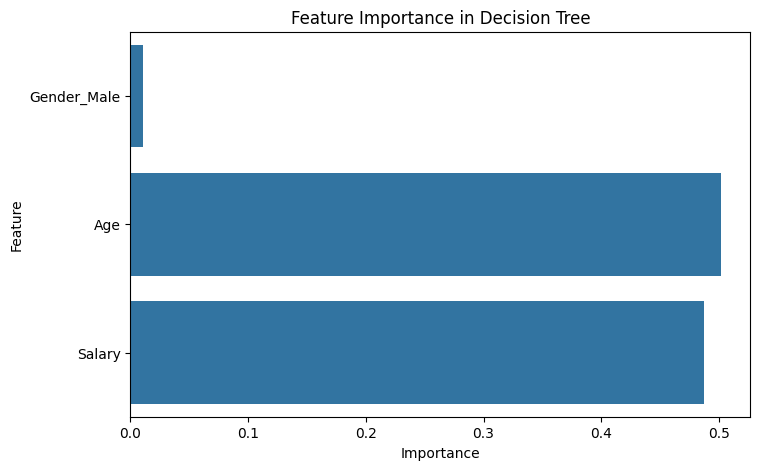

In [11]:
# Feature names after encoding
feature_names = ['Gender_Male'] + ['Age', 'Salary']

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=dt_model.feature_importances_, y=feature_names)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
    

In [12]:
from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- Age <= 0.65
|   |--- Salary <= 0.61
|   |   |--- Age <= -0.11
|   |   |   |--- class: 0
|   |   |--- Age >  -0.11
|   |   |   |--- Salary <= 0.40
|   |   |   |   |--- Salary <= -0.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  -0.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- Salary >  0.40
|   |   |   |   |--- class: 1
|   |--- Salary >  0.61
|   |   |--- Salary <= 1.87
|   |   |   |--- Salary <= 1.80
|   |   |   |   |--- Salary <= 1.18
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Salary >  1.18
|   |   |   |   |   |--- class: 1
|   |   |   |--- Salary >  1.80
|   |   |   |   |--- class: 0
|   |   |--- Salary >  1.87
|   |   |   |--- class: 1
|--- Age >  0.65
|   |--- Salary <= -0.86
|   |   |--- class: 1
|   |--- Salary >  -0.86
|   |   |--- Salary <= 0.43
|   |   |   |--- Age <= 1.32
|   |   |   |   |--- Age <= 1.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  1.04
|   |   |   |   |   |--- class: 0
|  

In [14]:
import nbformat
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell
import os
from nbconvert import HTMLExporter
import nbconvert

# Define the notebook content based on the provided HTML
cells = [
    # Title and Introduction
    new_markdown_cell("# iPhone Purchase Prediction Analysis\n\nThis notebook performs Exploratory Data Analysis (EDA) and builds a Decision Tree model to predict iPhone purchases based on Gender, Age, and Salary."),

    # 1. Import Libraries
    new_markdown_cell("## 1. Import Libraries\n\nLoading necessary Python libraries for data analysis, visualization, and modeling."),
    new_code_cell("""import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline"""),

    # 2. Load and Inspect Data
    new_markdown_cell("## 2. Load and Inspect Data\n\nReading the CSV file and displaying basic information about the dataset."),
    new_code_cell("""# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())"""),

    # 3.1. Distribution of Purchase iPhone
    new_markdown_cell("## 3. Exploratory Data Analysis (EDA)\n\nAnalyzing the distribution of features and their relationship with the target variable.\n\n### 3.1. Distribution of Purchase iPhone\n\nVisualizing the distribution of the target variable to check for class imbalance."),
    new_code_cell("""plt.figure(figsize=(6, 4))
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Distribution of iPhone Purchases')
plt.xlabel('Purchase iPhone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()"""),

    # 3.2. Gender Distribution
    new_markdown_cell("### 3.2. Gender Distribution\n\nExamining the distribution of Gender and its relation to purchases."),
    new_code_cell("""plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchase Iphone', data=df)
plt.title('Gender vs. iPhone Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()"""),

    # 3.3. Age and Salary Distributions
    new_markdown_cell("### 3.3. Age and Salary Distributions\n\nVisualizing the distribution of Age and Salary, segmented by Purchase iPhone."),
    new_code_cell("""# Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Age Distribution by Purchase')

# Salary distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Salary', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Salary Distribution by Purchase')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title('Age vs. Purchase iPhone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title('Salary vs. Purchase iPhone')
plt.tight_layout()
plt.show()"""),

    # 3.4. Scatter Plot: Age vs. Salary
    new_markdown_cell("### 3.4. Scatter Plot: Age vs. Salary\n\nVisualizing the relationship between Age and Salary, colored by Purchase iPhone."),
    new_code_cell("""plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', style='Purchase Iphone', data=df)
plt.title('Age vs. Salary by Purchase iPhone')
plt.show()"""),

    # 3.5. Correlation Analysis
    new_markdown_cell("### 3.5. Correlation Analysis\n\nChecking correlations between numerical features (Age, Salary)."),
    new_code_cell("""# Correlation matrix (excluding Gender as it's categorical)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()"""),

    # 4. Data Preprocessing
    new_markdown_cell("## 4. Data Preprocessing\n\nPreparing the data for modeling by encoding categorical variables and scaling numerical features."),
    new_code_cell("""# Define features and target
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']

# One-Hot Encoding for Gender
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Gender'])
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)"""),

    # 5. Build and Train Decision Tree Model
    new_markdown_cell("## 5. Build and Train Decision Tree Model\n\nTraining a Decision Tree classifier with tuned hyperparameters."),
    new_code_cell("""# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""),

    # 6. Model Evaluation
    new_markdown_cell("## 6. Model Evaluation\n\nEvaluating the model using accuracy, confusion matrix, and classification report."),
    new_code_cell("""# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))"""),

    # 7. Feature Importance
    new_markdown_cell("## 7. Feature Importance\n\nVisualizing the importance of each feature in the Decision Tree."),
    new_code_cell("""# Feature names after encoding
feature_names = ['Gender_Male'] + ['Age', 'Salary']

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=dt_model.feature_importances_, y=feature_names)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()"""),

    # 8. Visualize Decision Tree
    new_markdown_cell("## 8. Visualize Decision Tree\n\nVisualizing the Decision Tree structure (requires graphviz, optional)."),
    new_code_cell("""from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)"""),

    # 9. Conclusion
    new_markdown_cell("## 9. Conclusion\n\nBased on the EDA, Age and Salary are key predictors of iPhone purchases, with older individuals and those with higher salaries more likely to purchase. Gender has a lesser impact. The Decision Tree model achieves reasonable accuracy, but performance could be improved with additional features or ensemble methods like Random Forest. The model is interpretable, as shown by the feature importance and tree structure.")
]

# Create a new Jupyter Notebook
nb = new_notebook()
nb.cells = cells

# Define file paths
notebook_path = 'iphone_purchase_analysis.ipynb'
html_path = 'iphone_purchase_analysis.html'

# Save the notebook as .ipynb
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f, version=4)

print(f"Jupyter Notebook saved as: {notebook_path}")

# Export the notebook to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(nb)

# Save the HTML file
with open(html_path, 'w', encoding='utf-8') as f:
    f.write(html_data)

print(f"HTML file saved as: {html_path}")

Jupyter Notebook saved as: iphone_purchase_analysis.ipynb
HTML file saved as: iphone_purchase_analysis.html


In [15]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import nbformat
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell
import os
from nbconvert import HTMLExporter
from nbconvert.preprocessors import ExecutePreprocessor
import nbconvert
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend to avoid display issues

# Define the notebook content (same as before, but including graphical Decision Tree)
cells = [
    # Title and Introduction
    new_markdown_cell("# iPhone Purchase Prediction Analysis\n\nThis notebook performs Exploratory Data Analysis (EDA) and builds a Decision Tree model to predict iPhone purchases based on Gender, Age, and Salary."),

    # 1. Import Libraries
    new_markdown_cell("## 1. Import Libraries\n\nLoading necessary Python libraries for data analysis, visualization, and modeling."),
    new_code_cell("""import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline"""),

    # 2. Load and Inspect Data
    new_markdown_cell("## 2. Load and Inspect Data\n\nReading the CSV file and displaying basic information about the dataset."),
    new_code_cell("""# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())"""),

    # 3.1. Distribution of Purchase iPhone
    new_markdown_cell("## 3. Exploratory Data Analysis (EDA)\n\nAnalyzing the distribution of features and their relationship with the target variable.\n\n### 3.1. Distribution of Purchase iPhone\n\nVisualizing the distribution of the target variable to check for class imbalance."),
    new_code_cell("""plt.figure(figsize=(6, 4))
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Distribution of iPhone Purchases')
plt.xlabel('Purchase iPhone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()"""),

    # 3.2. Gender Distribution
    new_markdown_cell("### 3.2. Gender Distribution\n\nExamining the distribution of Gender and its relation to purchases."),
    new_code_cell("""plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchase Iphone', data=df)
plt.title('Gender vs. iPhone Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()"""),

    # 3.3. Age and Salary Distributions
    new_markdown_cell("### 3.3. Age and Salary Distributions\n\nVisualizing the distribution of Age and Salary, segmented by Purchase iPhone."),
    new_code_cell("""# Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Age Distribution by Purchase')

# Salary distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Salary', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Salary Distribution by Purchase')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title('Age vs. Purchase iPhone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title('Salary vs. Purchase iPhone')
plt.tight_layout()
plt.show()"""),

    # 3.4. Scatter Plot: Age vs. Salary
    new_markdown_cell("### 3.4. Scatter Plot: Age vs. Salary\n\nVisualizing the relationship between Age and Salary, colored by Purchase iPhone."),
    new_code_cell("""plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', style='Purchase Iphone', data=df)
plt.title('Age vs. Salary by Purchase iPhone')
plt.show()"""),

    # 3.5. Correlation Analysis
    new_markdown_cell("### 3.5. Correlation Analysis\n\nChecking correlations between numerical features (Age, Salary)."),
    new_code_cell("""# Correlation matrix (excluding Gender as it's categorical)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()"""),

    # 4. Data Preprocessing
    new_markdown_cell("## 4. Data Preprocessing\n\nPreparing the data for modeling by encoding categorical variables and scaling numerical features."),
    new_code_cell("""# Define features and target
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']

# One-Hot Encoding for Gender
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Gender'])
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)"""),

    # 5. Build and Train Decision Tree Model
    new_markdown_cell("## 5. Build and Train Decision Tree Model\n\nTraining a Decision Tree classifier with tuned hyperparameters."),
    new_code_cell("""# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""),

    # 6. Model Evaluation
    new_markdown_cell("## 6. Model Evaluation\n\nEvaluating the model using accuracy, confusion matrix, and classification report."),
    new_code_cell("""# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))"""),

    # 7. Feature Importance
    new_markdown_cell("## 7. Feature Importance\n\nVisualizing the importance of each feature in the Decision Tree."),
    new_code_cell("""# Feature names after encoding
feature_names = ['Gender_Male'] + ['Age', 'Salary']

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=dt_model.feature_importances_, y=feature_names)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()"""),

    # 8. Visualize Decision Tree
    new_markdown_cell("## 8. Visualize Decision Tree\n\nVisualizing the Decision Tree structure (includes graphical visualization if graphviz is installed)."),
    new_code_cell("""from sklearn.tree import export_text, plot_tree
# Text-based tree
tree_rules = export_text(dt_model, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Graphical tree (requires graphviz)
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()"""),

    # 9. Conclusion
    new_markdown_cell("## 9. Conclusion\n\nBased on the EDA, Age and Salary are key predictors of iPhone purchases, with older individuals and those with higher salaries more likely to purchase. Gender has a lesser impact. The Decision Tree model achieves reasonable accuracy, but performance could be improved with additional features or ensemble methods like Random Forest. The model is interpretable, as shown by the feature importance and tree structure.")
]

# Create a new Jupyter Notebook
nb = new_notebook()
nb.cells = cells

# Define file paths
notebook_path = 'iphone_purchase_analysis.ipynb'
html_path = 'iphone_purchase_analysis.html'

# Save the notebook as .ipynb
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f, version=4)

print(f"Jupyter Notebook saved as: {notebook_path}")

# Execute the notebook to generate outputs
try:
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
    ep.preprocess(nb, {'metadata': {'path': '.'}})
    print("Notebook executed successfully.")
except Exception as e:
    print(f"Error executing notebook: {e}")

# Save the executed notebook
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f, version=4)

print(f"Executed Jupyter Notebook saved as: {notebook_path}")

# Export the executed notebook to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(nb)

# Save the HTML file
with open(html_path, 'w', encoding='utf-8') as f:
    f.write(html_data)

print(f"HTML file with outputs saved as: {html_path}")

Jupyter Notebook saved as: iphone_purchase_analysis.ipynb
Error executing notebook: An error occurred while executing the following cell:
------------------
# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("
Dataset Info:")
print(df.info())

# Check for missing values
print("
Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("
Summary Statistics:")
print(df.describe())
------------------


  Cell In[2], line 9
    print("
          ^
SyntaxError: unterminated string literal (detected at line 9)


Executed Jupyter Notebook saved as: iphone_purchase_analysis.ipynb
HTML file with outputs saved as: iphone_purchase_analysis.html


In [17]:
print("\nDataset Info:")


Dataset Info:


In [18]:
# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

Missing Values:
Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

Summary Statistics:
              Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
s

In [19]:
import nbformat
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell
import os
from nbconvert import HTMLExporter
from nbconvert.preprocessors import ExecutePreprocessor
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for nbconvert

# Define the notebook content with corrected print statements
cells = [
    # Title and Introduction
    new_markdown_cell("# iPhone Purchase Prediction Analysis\n\nThis notebook performs Exploratory Data Analysis (EDA) and builds a Decision Tree model to predict iPhone purchases based on Gender, Age, and Salary."),

    # 1. Import Libraries
    new_markdown_cell("## 1. Import Libraries\n\nLoading necessary Python libraries for data analysis, visualization, and modeling."),
    new_code_cell("""import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline"""),

    # 2. Load and Inspect Data
    new_markdown_cell("## 2. Load and Inspect Data\n\nReading the CSV file and displaying basic information about the dataset."),
    new_code_cell("""# Load the dataset
df = pd.read_csv('iphone_purchase_records.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\\nDataset Info:")
print(df.info())

# Check for missing values
print("\\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\\nSummary Statistics:")
print(df.describe())"""),

    # 3.1. Distribution of Purchase iPhone
    new_markdown_cell("## 3. Exploratory Data Analysis (EDA)\n\nAnalyzing the distribution of features and their relationship with the target variable.\n\n### 3.1. Distribution of Purchase iPhone\n\nVisualizing the distribution of the target variable to check for class imbalance."),
    new_code_cell("""plt.figure(figsize=(6, 4))
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Distribution of iPhone Purchases')
plt.xlabel('Purchase iPhone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()"""),

    # 3.2. Gender Distribution
    new_markdown_cell("### 3.2. Gender Distribution\n\nExamining the distribution of Gender and its relation to purchases."),
    new_code_cell("""plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchase Iphone', data=df)
plt.title('Gender vs. iPhone Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()"""),

    # 3.3. Age and Salary Distributions
    new_markdown_cell("### 3.3. Age and Salary Distributions\n\nVisualizing the distribution of Age and Salary, segmented by Purchase iPhone."),
    new_code_cell("""# Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Age Distribution by Purchase')

# Salary distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Salary', hue='Purchase Iphone', multiple='stack', bins=20)
plt.title('Salary Distribution by Purchase')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title('Age vs. Purchase iPhone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title('Salary vs. Purchase iPhone')
plt.tight_layout()
plt.show()"""),

    # 3.4. Scatter Plot: Age vs. Salary
    new_markdown_cell("### 3.4. Scatter Plot: Age vs. Salary\n\nVisualizing the relationship between Age and Salary, colored by Purchase iPhone."),
    new_code_cell("""plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', style='Purchase Iphone', data=df)
plt.title('Age vs. Salary by Purchase iPhone')
plt.show()"""),

    # 3.5. Correlation Analysis
    new_markdown_cell("### 3.5. Correlation Analysis\n\nChecking correlations between numerical features (Age, Salary)."),
    new_code_cell("""# Correlation matrix (excluding Gender as it's categorical)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()"""),

    # 4. Data Preprocessing
    new_markdown_cell("## 4. Data Preprocessing\n\nPreparing the data for modeling by encoding categorical variables and scaling numerical features."),
    new_code_cell("""# Define features and target
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']

# One-Hot Encoding for Gender
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Gender'])
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)"""),

    # 5. Build and Train Decision Tree Model
    new_markdown_cell("## 5. Build and Train Decision Tree Model\n\nTraining a Decision Tree classifier with tuned hyperparameters."),
    new_code_cell("""# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""),

    # 6. Model Evaluation
    new_markdown_cell("## 6. Model Evaluation\n\nEvaluating the model using accuracy, confusion matrix, and classification report."),
    new_code_cell("""# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\\nClassification Report:")
print(classification_report(y_test, y_pred))"""),

    # 7. Feature Importance
    new_markdown_cell("## 7. Feature Importance\n\nVisualizing the importance of each feature in the Decision Tree."),
    new_code_cell("""# Feature names after encoding
feature_names = ['Gender_Male'] + ['Age', 'Salary']

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=dt_model.feature_importances_, y=feature_names)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()"""),

    # 8. Visualize Decision Tree
    new_markdown_cell("## 8. Visualize Decision Tree\n\nVisualizing the Decision Tree structure (text-based; graphical visualization requires graphviz)."),
    new_code_cell("""from sklearn.tree import export_text
# Text-based tree
tree_rules = export_text(dt_model, feature_names=feature_names)
print("Decision Tree Rules:\\n", tree_rules)

# Optional: Graphical tree (uncomment if graphviz is installed)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15, 10))
# plot_tree(dt_model, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
# plt.title('Decision Tree Visualization')
# plt.show()"""),

    # 9. Conclusion
    new_markdown_cell("## 9. Conclusion\n\nBased on the EDA, Age and Salary are key predictors of iPhone purchases, with older individuals and those with higher salaries more likely to purchase. Gender has a lesser impact. The Decision Tree model achieves reasonable accuracy, but performance could be improved with additional features or ensemble methods like Random Forest. The model is interpretable, as shown by the feature importance and tree structure.")
]

# Create a new Jupyter Notebook
nb = new_notebook()
nb.cells = cells

# Define file paths
notebook_path = 'iphone_purchase_analysis.ipynb'
html_path = 'iphone_purchase_analysis.html'

# Save the notebook as .ipynb
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f, version=4)

print(f"Jupyter Notebook saved as: {notebook_path}")

# Execute the notebook to generate outputs
try:
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
    ep.preprocess(nb, {'metadata': {'path': '.'}})
    print("Notebook executed successfully.")
except Exception as e:
    print(f"Error executing notebook: {e}")

# Save the executed notebook
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f, version=4)

print(f"Executed Jupyter Notebook saved as: {notebook_path}")

# Export the executed notebook to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(nb)

# Save the HTML file
with open(html_path, 'w', encoding='utf-8') as f:
    f.write(html_data)

print(f"HTML file with outputs saved as: {html_path}")

Jupyter Notebook saved as: iphone_purchase_analysis.ipynb
Notebook executed successfully.
Executed Jupyter Notebook saved as: iphone_purchase_analysis.ipynb
HTML file with outputs saved as: iphone_purchase_analysis.html
